In [1]:
from scipy import stats
import pandas as pd
import numpy as np
import math
import json
from tqdm import tqdm
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

In [2]:
def crime_clean_data(df):
    df['CMPLNT_FR_DT'] = pd.to_datetime(df['CMPLNT_FR_DT'], errors='coerce')
    return df[(df['CMPLNT_FR_DT'] > '2017-01-01 00:00:00') & (df['CMPLNT_FR_DT'] < '2018-01-01 00:00:00') & ~df['CMPLNT_FR_DT'].isnull() & ~np.isnan(df.Latitude)]


In [3]:
def liquor_clean_data(df):
    df['License Effective Date'] = pd.to_datetime(df['License Effective Date'], errors='coerce')
    return df[(df['License Effective Date'] > '2017-01-01 00:00:00') & \
              (df['License Effective Date'] < '2018-01-01 00:00:00') & (~df['License Effective Date'].isnull()) & \
              (df['Agency Zone Office Name'] == 'New York City') & (~np.isnan(df.Latitude)) & \
              (df['License Type Name'].str.contains('ON-PREMISES LIQUOR'))]

In [4]:
def get_within_km(loc, df):
    lat_limits, lng_limits = bounds_within_km(loc)
    return df[(df['Latitude'] < lat_limits[1]) & (df['Latitude'] > lat_limits[0]) & \
              (df['Longitude'] < lng_limits[1]) & (df['Longitude'] > lng_limits[0])]

In [5]:
def bounds_within_km(loc):
    dist = 1.6 # 1km
    radius = 6371 # Earth Radius in km
    lat = loc[0]
    lng = loc[1]
    max_lat = lat + np.rad2deg(dist/float(radius))
    min_lat = lat - np.rad2deg(dist/float(radius))
    max_lng = lng + np.rad2deg(dist/float(radius)/math.cos(np.deg2rad(lat)))
    min_lng = lng - np.rad2deg(dist/float(radius)/math.cos(np.deg2rad(lat)))
    
    return (min_lat, max_lat), (min_lng, max_lng)

In [6]:
crime_df = pd.read_csv("../input/nypd-complaint-data-historic-20062019/NYPD_Complaint_Data_Historic.csv")
crime_df= crime_clean_data(crime_df)

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3552: DtypeWarning: Columns (18,20) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [7]:
print(crime_df.count())
liquor_df = pd.read_csv("../input/liquor-license-dataset/liquor.csv",delimiter=',', low_memory=False)
liquor_df= liquor_clean_data(liquor_df)

CMPLNT_NUM           466190
CMPLNT_FR_DT         466190
CMPLNT_FR_TM         466190
CMPLNT_TO_DT         393521
CMPLNT_TO_TM         393722
ADDR_PCT_CD          466190
RPT_DT               466190
KY_CD                466190
OFNS_DESC            466166
PD_CD                465915
PD_DESC              465915
CRM_ATPT_CPTD_CD     466190
LAW_CAT_CD           466190
BORO_NM              465912
LOC_OF_OCCUR_DESC    375905
PREM_TYP_DESC        464379
JURIS_DESC           466190
JURISDICTION_CODE    465915
PARKS_NM               4112
HADEVELOPT            24154
HOUSING_PSA           37336
X_COORD_CD           466190
Y_COORD_CD           466190
SUSP_AGE_GROUP       343663
SUSP_RACE            343663
SUSP_SEX             343663
TRANSIT_DISTRICT      12072
Latitude             466190
Longitude            466190
Lat_Lon              466190
PATROL_BORO          465915
STATION_NAME          12072
VIC_AGE_GROUP        466189
VIC_RACE             466189
VIC_SEX              466189
dtype: int64


In [8]:
liquor_df.head()

,License Serial Number,License Type Name,License Class Code,License Type Code,Agency Zone Office Name,Agency Zone Office Number,County Name (Licensee),Premises Name,Doing Business As (DBA),Actual Address of Premises (Address1),...,City,State,Zip,License Certificate Number,License Original Issue Date,License Effective Date,License Expiration Date,Latitude,Longitude,Location
216,1003823,ON-PREMISES LIQUOR,252.0,OP,New York City,1,BRONX,KENNETH MCPARTLAN TAVERN CORP,GLEN ROY TAVERN,145 E 149TH STREET,...,BRONX,NY,10451,871883,06/04/1979,2017-03-01,02/28/2019,40.818850,-73.928023,"(40.8188496305, -73.9280225703)"
218,1003854,ON-PREMISES LIQUOR,252.0,OP,New York City,1,BRONX,STEBAR FOOD CORP,WALNUT BUSSTOP COFFEE SHOP,881 883 E 134TH STREET,...,BRONX,NY,10454,871647,NaN,2017-03-01,02/28/2019,40.800418,-73.910742,"(40.8004178483, -73.9107424039)"
219,1003874,ON-PREMISES LIQUOR,252.0,OP,New York City,1,BRONX,LA LECHONERA CRIOLLA INC,NaN,1709 WEBSTER AVE,...,BRONX,NY,10457,876365,12/07/2011,2017-07-03,05/31/2019,40.843393,-73.903519,"(40.8433926669, -73.9035191554)"
220,1003876,ON-PREMISES LIQUOR,252.0,OP,New York City,1,BRONX,EL DIAMANTE RESTAURANT CORP,EL DIAMANTE RESTAURANT,4371 3RD AVE,...,BRONX,NY,10457,877658,01/17/2013,2017-08-01,07/31/2019,40.850702,-73.894171,"(40.8507021199, -73.8941708951)"
221,1003885,ON-PREMISES LIQUOR,252.0,OP,New York City,1,BRONX,DOMINICKS BAR & RESTAURANT INC,NaN,2335 ARTHUR AVENUE,...,BRONX,NY,10458,874887,NaN,2017-06-01,05/31/2019,40.854135,-73.888850,"(40.8541348889, -73.8888496394)"


In [9]:
same = 0
diff = 0
left_skew = 0
equal = 0
right_skew = 0

cum_prev_dist = []
cum_after_dist = []
Period = 60
with tqdm(total=len(list(liquor_df.iterrows()))) as pbar:
    for idx, row in liquor_df.iterrows():
        tup = eval(row['Location'])
        
        crime_loc_df = get_within_km(tup, crime_df)
        
        license_time = pd.to_datetime(row['License Effective Date'])
        prev = license_time.to_pydatetime() + timedelta(days=-Period)
        
        prev_dist = []
        after_dist = []
        
        for date in pd.date_range(prev, periods=Period):
            q_date = date.strftime("%m/%d/%Y")
            prev_dist.append(len(crime_loc_df[crime_loc_df['CMPLNT_FR_DT'] == q_date]))
        cum_prev_dist.append(prev_dist)
        
        for date in pd.date_range(license_time, periods=Period):
            q_date = date.strftime("%m/%d/%Y")
            after_dist.append(len(crime_loc_df[crime_loc_df['CMPLNT_FR_DT'] == q_date]))
            
        cum_after_dist.append(after_dist)
        # N = 60, statistic= 0.1753
        # N = 30, statistic= 0.24170
        if stats.ks_2samp(prev_dist, after_dist)[0] > 0.1753: # 95% CI, 30 days of samples. Reject Null Hypothesis (to be the same)
            prev_skew = sum(prev_dist)
            after_skew = sum(after_dist)      
            if after_skew > prev_skew:
                right_skew += 1
            elif after_skew < prev_skew:
                left_skew += 1
            else:
                equal += 1
            diff += 1
        else:
            same += 1
        pbar.update(1)

100%|██████████| 5113/5113 [08:30<00:00, 10.03it/s]


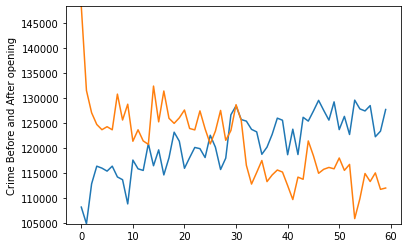

Number of Results with same distribution: 3375
Number of Results with hike: 1738
Crime remained same for diff distributions: 0
Crime decreased: 669
Crime increase: 1069


In [10]:
cum_prev_dist = np.array(cum_prev_dist)
cum_prev_dist = np.array(cum_prev_dist).sum(axis=0)

plt.plot(cum_prev_dist)
plt.ylabel('Crime Before and After opening')
cum_after_dist = np.array(cum_after_dist)
cum_after_dist = np.array(cum_after_dist).sum(axis=0)
plt.ylim(min(np.amin(cum_after_dist), np.amin(cum_prev_dist)), max(np.amax(cum_after_dist), np.amax(cum_prev_dist)))

plt.plot(cum_after_dist)
plt.show()
print("Number of Results with same distribution: " + str(same))
print("Number of Results with hike: " + str(diff))

print("Crime remained same for diff distributions: " + str(equal))
print("Crime decreased: " + str(left_skew))
print("Crime increase: " + str(right_skew))